In [20]:
import rftool.pcb as pcb
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import  epsilon_0, mu_0
from scipy.special import ellipk
import math

In [21]:
def cpw_Z0_Wadell(a,b,h,t,e_r):
    # a - width of center linea
    # b - width of center line + 2x gap = a + 2g
    # h - height of substrate
    # e_r - relative dielectric constant
    k = a/b
    k1 = np.tanh(np.pi*a/(4*h))/np.tanh(np.pi*b/(4*h))
    k_prim = np.sqrt(1 - k**2)
    k1_prim = np.sqrt(1 - k1**2)
    
    K = ellipk(k)
    K_prim = ellipk(k_prim)
    K1 = ellipk(k1)
    K1_prim = ellipk(k1_prim)    
    
    eps_eff = (1+e_r*((K_prim)/(K))*((K1)/(K1_prim)))/(1+((K_prim)/(K))*((K1)/(K1_prim)))
    Z0 = (60*np.pi/np.sqrt(eps_eff))*1/(K/K_prim+K1/K1_prim)
    return Z0

In [22]:
def stripline_Z0_Wadell_t0(w,b,e_r):    
    k = 1/np.cosh(np.pi*w/(2*b))
    k_prim = np.tanh(np.pi*w/(2*b))
    K = ellipk(k)
    K_prim = ellipk(k_prim)    
    Z0 = (np.sqrt(mu_0/epsilon_0)/4)*K/K_prim
    return Z0

In [24]:
def stripline_Z0_Wadell(w,b,e_r,t):    
    m = 6/(3+2*t/b)
    num = np.exp(1)
    den1 = (1/(2*b/t+1))**2
    den2 = ((1/(4*np.pi))/(w/t+1.1))**m
    den = np.sqrt(den1+den2)
    delta_w_over_t =(1/np.pi)*np.log(num/den)
    w_prim = w + delta_w_over_t*t
    
    fact1 = np.sqrt(mu_0/epsilon_0)/(2*np.pi*np.sqrt(e_r))
    fact2 = (8*b)/(np.pi*w_prim)
    
    Z0 = fact1*np.log(1+0.5*fact2*(fact2+np.sqrt(fact2**2+6.27)))
    
    return Z0

In [25]:
h = np.linspace(0.5,1,100)
w = np.linspace(0.5,4,100)
e_r = np.empty([100,1])
e_r.fill(4.5)
e_r = np.squeeze(e_r)

In [27]:
Z_static = pcb.microstripImpedanceHJ( h, w, e_r )
g = 0.2
b = a + 2*g
t = 0.035
Z_CPW = cpw_Z0_Wadell(w,b,h,t,e_r)
Z_STRIP = stripline_Z0_Wadell(w,h,e_r,t)
w_over_h = w/h

In [28]:
e_r = np.empty([100,1])
e_r.fill(2.2)
e_r = np.squeeze(e_r)

In [53]:
Z_static_2 = pcb.microstripImpedanceHJ( h, w, e_r )
g = 0.2
b = a + 2*g
t = 0.035
Z_CPW_2 = cpw_Z0_Wadell(a,b,h,t,e_r)
Z_STRIP_2 = stripline_Z0_Wadell(w,h,e_r,t)

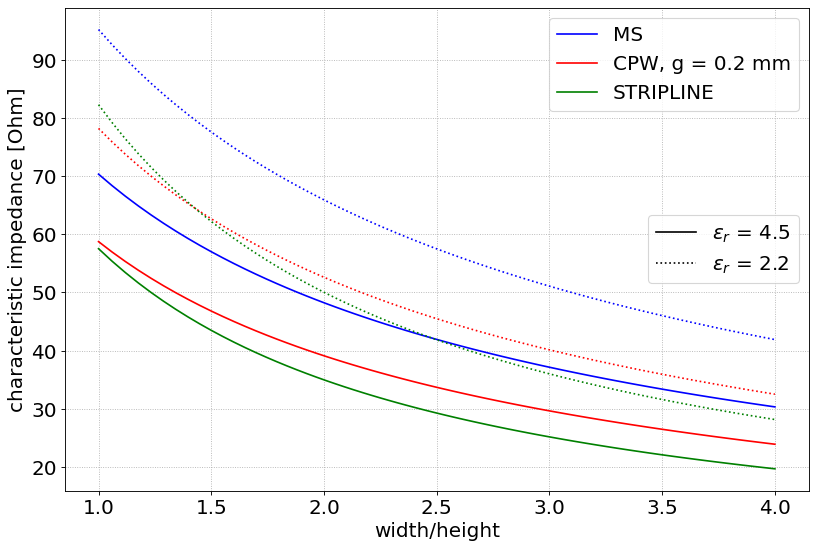

In [55]:
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
plt.rcParams.update({'font.size': 18})  
axes = plt.gca()  
axes.set_xscale("linear")
axes.set_yscale("linear")
plt.grid(True,which="both",ls=":")
#plt.title('PCB, $\epsilon_r$ = 4.5')
plt.xlabel('width/height')
plt.ylabel('characteristic impedance [Ohm]')

line1, = axes.plot(w_over_h, Z_static, linestyle='-', color='b', label='MS')
axes.plot(w_over_h, Z_CPW, linestyle='-', color='r', label='CPW, g = 0.2 mm')
axes.plot(w_over_h, Z_STRIP, linestyle='-', color='g', label='STRIPLINE')
line2, = axes.plot(w_over_h, Z_static_2, linestyle=':', color='b')
axes.plot(w_over_h, Z_CPW_2, linestyle=':', color='r')
axes.plot(w_over_h, Z_STRIP_2, linestyle=':', color='g')

# Add first legend:  only labeled data is included
leg1 = axes.legend(loc=1)
# Add second legend for the maxes and mins.
# leg1 will be removed from figure
leg2 = axes.legend([line1,line2],['$\epsilon_r$ = 4.5','$\epsilon_r$ = 2.2'], loc='center right')
leg2.legendHandles[0].set_color('black')
leg2.legendHandles[1].set_color('black')
# Manually add the first legend back
axes.add_artist(leg1)

#legend1 = plt.legend([lines1[i] for i in [0,1,2]], ['MS', 'CPW, g = 0.2 mm', 'STRIPLINE'], loc = 1)
# for i in [0,1,2]], ["algo1", "algo2", "algo3"], loc=1)
#legend2 = pyplot.legend([lines[i] for i in [0,3,6]], parameters, loc=4)
#axes.add_artist(legend1)
#axes.add_artist(legend2)

In [ ]:
num = np.exp(1)
num

DALJE MOJ KOD:

In [ ]:
def coupledMicrostrip_Z0_even(W, s, h, e_r):
    #W = width of a microstrip line
    #s = spacing between the cuoupled microstrip lines
    #h = substrate height
    
    u = W / h
    g = s / h
    
    e_eff_0 = 0.5 * (e_r + 1) + 0.5 * (e_r - 1) * pow((1 + 10 * h / W), a_e * b_e)
    
    #Even mode
    
    v = u * (20 + pow(g, 2)) / (10 + pow(g, 2)) + g * math.exp(-g)
    a_e = 1 + np.ln((pow(v, 4) + pow((w / 52), 2)) / (pow(v, 4) + 0.432)) / 49 + np.ln(1 + pow((v / 18.1), 3)) / 18.7
    b_e = 0.564 * pow((e_r - 0.9) / (e_r + 3), 0.053)
    
    e_eff_0_e = 0,5 * (e_r + 1) + 0,5 * (e_r - 1) * pow((1 + 10/v), (-a_e * b_e))
    
    Q1 = 0.8695 * pow(u, 0.194)
    Q2 = 1 + 0.7519 * g + 0.189 * pow(g, 2.31)
    Q3 = 0.1975 + pow((16.6 + pow((8.4 / g), 6)), -0.387) + np.ln(pow(g, 10) / (1 + pow((g / 3.4), 10))) / 241
    Q4 = 2 * Q1 / (Q2 * (math.exp(-g) * pow(u, Q3) + (2 - exp(-g)) * pow(u, -Q3)))
    
    f_u = 6 + (2 * math.pi - 6) * math.exp(-pow(30.666 * h / W, 0.7528))
    Z_1 = 377 * np.ln(f_u * h / W + math.sqrt(1 + pow(2 * h / W, 2))) / (2 * math.pi)
    Z_0 = Z_1 / math.sqrt(e_r)
    
    Z_0_e = math.sqrt(e_eff_0 / e_eff_0_e) * Z_0 / (1 - Z_0 * math.sqrt(e_eff_0) * Q4 / 377)
    
    return Z_0_e

In [ ]:
def coupledMicrostrip_Z0_odd(W, s, h, e_r):
    
    #Odd mode 
    
    a_o = 0.7287 * (e_eff_0 - 0.5 * (e_r + 1)) * (1 - math.exp(-0.179 * u))
    b_o = 0.747 * e_r / (0.15 + e_r)
    c_o = b_o - (b_o - 0.207) * math.exp(-0.414 * u)
    d_o = 0.593 + 0.694 * math.exp(-0.562 * u)
    
    e_eff_0_o = (0.5 * (e_r + 1) + a_o - e_eff_0) * math.exp(-c_o * pow(g, d_o)) + e_eff_0
    
    Q5 = 1.794 + 1.14 * np.ln(1 + 0.638 / (g + 0.517 * pow(g, 2.43)))
    Q6 = 0.2305 + np.ln(pow(g, 10) / (1 + pow(g / 5.8, 10))) / 281.3 + np.ln(1 + 0.598 * pow(g, 1.154)) / 5.1
    Q7 = (10 + 190 * pow(g, 2)) / (1 + 82.3 * pow(g, 3))
    Q8 = math.exp(-6.5 - 0.95 * np.ln(g) - pow(( / 0.15), 5))
    Q9 = np.ln(Q7) * (Q8 + 1 / 16.5)
    Q10 = Q4 - Q5 * pow(u, Q6 * pow(u, -Q9)) / Q2
    
    Z_0_o = math.sqrt(e_eff_0 / e_eff_0_o) * Z_0 / (1 - Z_0 * math.sqrt(e_eff_0) * Q10 / 377)
    
    return Z_0_o

In [ ]:
#KOD ZA CRTANJE
    
    #Z_even(spacing) & Z_odd(spacing) -> pune linije, W = h = 1mm
    #Z_even(width) & Z_odd(width) -> isprekidane linije, s = h = 1mm
    s1 = np.linspace(0.2, 1, 100)
    
    e_r1 = np.empty([100, 1])
    e_r1.fill(4.5)
    e_r1 = np.squeeze(e_r1)
    
    W1 = np.empty([100, 1])
    W1.fill(1)
    W1 = np.squeeze(W1)
    
    h1 = np.empty([100, 1])
    h1.fill(1)
    h1 = np.squeeze(h1)
    
    Z_even1 = coupledMicrostrip_Z0_even(W1, s1, h1, e_r1)
    Z_odd1 = coupledMicrostrip_Z0_odd(W1, s1, h1, e_r1)
    
    W2 = np.linespace(0.2, 1, 100)
    
    e_r2 = np.empty([100, 1])
    e_r2.fill(4.5)
    e_r2 = np.squeeze(e_r2)
    
    s2 = np.empty([100, 1])
    s2.fill(1)
    s2 = np.squeeze(s2)
    
    h2 = np.empty([100, 1])
    h2.fill(1)
    h2 = np.squeeze(h2)
    
    Z_even2 = coupledMicrostrip_Z0_even(W2, s2, h2, e_r2)
    Z_odd2 = coupledMicrostrip_Z0_odd(W2, s2, h2, e_r2)
    
    fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')     
    plt.rcParams.update({'font.size': 18})  
    axes = plt.gca()  
    axes.set_xscale("linear")
    axes.set_yscale("linear")
    plt.grid(True,which="both",ls=":")
    #plt.title('Z_even, w = h = 1 mm')
    plt.xlabel('spacing between the lines & line width [mm]')
    plt.ylabel('characteristic impedance of even mode [Ohm]')

    line1, = axes.plot(s1, Z_even1, linestyle='-', color='b', label='Even mode')
    axes.plot(s1, Z_odd1, linestyle='-', color='r', label='Odd mode')
    line2, = axes.plot(W2, Z_even2, linestyle=':', color='b')
    axes.plot(W2, Z_odd2, linestyle=':', color='r')

    # Add first legend:  only labeled data is included
    leg1 = axes.legend(loc=1)
    # Add second legend for the maxes and mins.
    # leg1 will be removed from figure
    leg2 = axes.legend([line1,line2],['function of spacing between the lines','function of the line width'], loc='center right')
    leg2.legendHandles[0].set_color('black')
    leg2.legendHandles[1].set_color('black')
    # Manually add the first legend back
    axes.add_artist(leg1)

    #legend1 = plt.legend([lines1[i] for i in [0,1,2]], ['MS', 'CPW, g = 0.2 mm', 'STRIPLINE'], loc = 1)
    # for i in [0,1,2]], ["algo1", "algo2", "algo3"], loc=1)
    #legend2 = pyplot.legend([lines[i] for i in [0,3,6]], parameters, loc=4)
    #axes.add_artist(legend1)
    #axes.add_artist(legend2)